In [1]:
from PIL import Image  # Python Imaging Library
import numpy as np

In [2]:
inicjaly = Image.open("bs.bmp")  # wczytywanie obrazu

print("tryb", inicjaly.mode)
print("format", inicjaly.format)
print("rozmiar", inicjaly.size)

t_inicjaly = np.asarray(inicjaly)
print("typ danych tablicy", t_inicjaly.dtype)  # typ danych przechowywanych w tablicy
print("rozmiar tablicy", t_inicjaly.shape)  # rozmiar tablicy - warto porównac z wymiarami obrazka

tryb 1
format BMP
rozmiar (100, 50)
typ danych tablicy bool
rozmiar tablicy (50, 100)


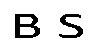

In [3]:
inicjaly
# inicjaly.show()

In [4]:
def rysuj_ramke_w_obrazie(obraz, grub):
    tab_obraz = np.asarray(obraz).astype(np.uint8)
    h, w = tab_obraz.shape
    for i in range(h):
        for j in range(grub):
            tab_obraz[i][j]=0 
        for j in range(w-grub,w):
            tab_obraz[i][j]=0   
        
    for i in range(grub):
        tab_obraz[i][:]=0
    for i in range(h-grub,h):
        tab_obraz[i][:]=0
        
    tab = tab_obraz.astype(bool)
    return Image.fromarray(tab)

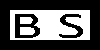

In [5]:
rysuj_ramke_w_obrazie(inicjaly, 10)

In [6]:

def rysuj_ramki(w, h, grub):
    tab = np.ones((h, w), dtype=np.uint8)
    
    ile = min(h, w)
    
    for i in range(ile):
        color = 0 if i % 2 == 0 else 255 
        tab[i * grub:h - i * grub, i * grub:w - i * grub] = color

    return Image.fromarray(tab)


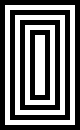

In [17]:
rysuj_ramki(80, 130, 5)


In [8]:
def rysuj_pasy_pionowe(w, h, grub):
    tab = np.ones((h, w), dtype=np.uint8)
    
    ile = int(w / grub)
    
    for k in range(ile):  
        for g in range(grub):  
            j = k * grub + g  
            if j < w:  
                tab[:, j] = 0 if k % 2 == 0 else 255 
  
    return Image.fromarray(tab)



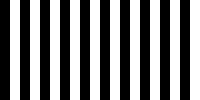

In [21]:
rysuj_pasy_pionowe(200, 100, 10)

In [10]:
def rysuj_wlasne(w, h, grub):
    tab = np.ones((h, w), dtype=np.uint8)
    
    # Liczba kwadratów
    ile_w = w // grub
    ile_h = h // grub

    for i in range(ile_h):
        for j in range(ile_w):
            color = 0 if (i + j) % 2 == 0 else 255  
            tab[i * grub:(i + 1) * grub, j * grub:(j + 1) * grub] = color
    return Image.fromarray(tab)




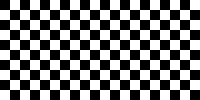

In [11]:
rysuj_wlasne(200, 100, 10)

In [12]:
def wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n):

    tab_bazowy = np.asarray(obraz_bazowy).astype(np.uint8)
    tab_wstawiany = np.asarray(obraz_wstawiany).astype(np.uint8)

    h_b, w_b = tab_bazowy.shape 
    h_w, w_w = tab_wstawiany.shape  

    n_k = min(h_b, n + h_w)  # Ograniczenie dolne dla wstawiania
    m_k = min(w_b, m + w_w)  # Ograniczenie prawe dla wstawiania
    n_p = max(0, n)          # Ograniczenie górne dla wstawiania
    m_p = max(0, m)          # Ograniczenie lewe dla wstawiania

    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            if 0 <= i - n < h_w and 0 <= j - m < w_w:
                tab_bazowy[i][j] = tab_wstawiany[i - n][j - m]

    return Image.fromarray(tab_bazowy)

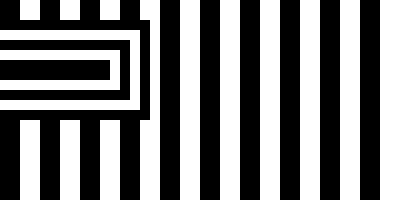

In [13]:
obraz_bazowy = rysuj_pasy_pionowe(400, 200, 20)
obraz_wstawiany = rysuj_ramki(200, 100, 10)

wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, -50, 20)

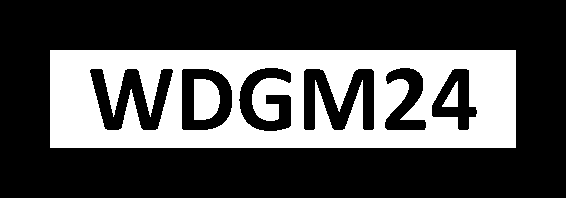

In [14]:
data = np.loadtxt('tablica.txt', dtype=int)  
def rysuj_ramke_w_obrazie(obraz, grub):
    tab_obraz = np.asarray(obraz).astype(np.uint8)
    h, w = tab_obraz.shape
    for i in range(h):
        for j in range(grub):
            tab_obraz[i][j]=0 
        for j in range(w-grub,w):
            tab_obraz[i][j]=0   
        
    for i in range(grub):
        tab_obraz[i][:]=0
    for i in range(h-grub,h):
        tab_obraz[i][:]=0
        
    tab = tab_obraz.astype(bool) 
    return Image.fromarray(tab)
rysuj_ramke_w_obrazie(data, 50)

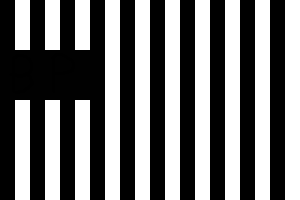

In [15]:
inicjaly = Image.open("iniciały.bmp")

wstaw_obraz_w_obraz(rysuj_pasy_pionowe(300,200,15),inicjaly,0,50)

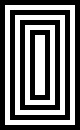

In [18]:
obrazek = Image.open("5.jpg")
obrazek

In [20]:
dane_obrazka = np.asarray(obrazek)
print("typ danych tablicy:", dane_obrazka.dtype)  # typ danych przechowywanych w tablicy
print("rozmiar tablicy:", dane_obrazka.shape)  # rozmiar tablicy - warto porównac z rozmiarami obrazka
print("liczba elementow:", dane_obrazka.size)  # liczba elementów tablicy
print("wymiar tablicy:", dane_obrazka.ndim)

typ danych tablicy: uint8
rozmiar tablicy: (130, 80, 3)
liczba elementow: 31200
wymiar tablicy: 3


In [22]:
# Wczytanie obrazu w formacie 256-kolorowym
obraz_256 = Image.open('6.bmp')

# Informacje o obrazie
tryb_obraz = obraz_256.mode  # Tryb obrazu
pixel_value = obraz_256.getpixel((66, 13))  # Wartość piksela w punkcie (66, 13)
element_tablicy = obraz_256.getpixel((97, 20))  # Wartość piksela w punkcie (97, 20)

# Wydrukowanie informacji
print(f"tryb obrazu: {tryb_obraz}; wartość piksela (66,13): {pixel_value}; wartość elementu tablicy (97,20): {element_tablicy}")


tryb obrazu: P; wartość piksela (66,13): 0; wartość elementu tablicy (97,20): 255
